<a href="https://colab.research.google.com/github/C4rohan/multivariate-weather-data-clustering/blob/main/Clustering_indexwise_weather_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
!pip install cftime
!pip install utils
!pip install netCDF4 
!pip install scipy
!pip install "xarray[io]"
!pip install geopandas
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import time 

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
from PIL import Image

import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point
from sklearn.cluster import KMeans, MiniBatchKMeans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 10.0 MB/s 
     |████████████████████████████████| 185 kB 42.6 MB/s 
     |████████████████████████████████| 140 kB 50.7 MB/s 
     |████████████████████████████████| 45 kB 4.3 MB/s 
     |████████████████████████████████| 19.3 MB 7.2 MB/s 
     |████████████████████████████████| 55 kB 4.5 MB/s 
     |████████████████████████████████| 114 kB 59.2 MB/s 
     |████████████████████████████████| 6.6 MB 26.4 MB/s 
  Created wheel for eccodes: filename=eccodes

/usr/local/lib/python3.7/dist-packages/xarray/backends/cfgrib_.py:28: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  "Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. "


In [2]:
import netCDF4
import netCDF4 as nc
import pandas as pd
import numpy as np
import xarray as xr
import datetime
import datetime as dt
from netCDF4 import date2num,num2date
import cftime
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import utils
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn import metrics




%matplotlib inline

#Read Data#

In [ ]:
path2 = ('mock.nc')
data1 = xr.open_dataset(path2, decode_times=False) #To view the date as integers of 0, 1, 2,....
data5 = xr.open_dataset(path2) # To view time in datetime format
data1
#data5['time']

/usr/local/lib/python3.7/dist-packages/xarray/backends/plugins.py:68: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:    (time: 365, longitude: 41, latitude: 41)
Coordinates:
  * time       (time) float64 0.0 1.0 2.0 3.0 4.0 ... 361.0 362.0 363.0 364.0
  * longitude  (longitude) float32 -33.0 -32.75 -32.5 ... -23.5 -23.25 -23.0
  * latitude   (latitude) float32 43.0 42.75 42.5 42.25 ... 33.5 33.25 33.0
Data variables:
    sp         (time, latitude, longitude) float64 ...
    sst        (time, latitude, longitude) float64 ...
    u10        (time, latitude, longitude) float64 ...
    v10        (time, latitude, longitude) float64 ...
    sshf       (time, latitude, longitude) float64 ...
    slhf       (time, latitude, longitude) float64 ...
    t2m        (time, latitude, longitude) float64 ...
Attributes:
    title:          Daily variables from ERA5 hourly data
    history:        Wed Mar 23 12:01:11 2022: ncrcat ERA5_meteo_sfc_2021_01-0...
    Input dataset:  /global/cscratch1/sd/xzheng/ENA/rawdata/ERA5_meteo_sfc_20...
    NCO:            netCDF Operators version 5.0.1 (Homepage = http://nco.sf....

In [ ]:
time=data1['time']
t2m=data1['t2m']
lat=data1['latitude']
lon=data1['longitude']

t2m

<xarray.DataArray 't2m' (time: 365, latitude: 41, longitude: 41)>
[613565 values with dtype=float64]
Coordinates:
  * time       (time) float64 0.0 1.0 2.0 3.0 4.0 ... 361.0 362.0 363.0 364.0
  * longitude  (longitude) float32 -33.0 -32.75 -32.5 ... -23.5 -23.25 -23.0
  * latitude   (latitude) float32 43.0 42.75 42.5 42.25 ... 33.5 33.25 33.0
Attributes:
    units:         K
    long_name:     2 metre temperature
    cell_methods:  time: mean

In [ ]:
%reset

In [ ]:
sst = data1.sst
print("day 1")
print(sst[0])
print('*********************************************************************')
print('day 2')
print(sst[1])

day 1
<xarray.DataArray 'sst' (latitude: 41, longitude: 41)>
array([[290.120809, 289.951065, 289.707562, ..., 288.439892, 288.388567,
        288.198508],
       [290.198989, 289.998528, 289.666025, ..., 288.520525, 288.499833,
        288.415408],
       [290.163838, 289.827557, 289.554076, ..., 288.577079, 288.422114,
        288.311406],
       ...,
       [293.42966 , 293.330301, 293.287398, ..., 292.561866, 292.545497,
        292.468126],
       [293.819399, 293.749753, 293.652318, ..., 292.604978, 292.599568,
        292.535987],
       [293.985156, 293.931781, 293.783077, ..., 292.614013, 292.607502,
        292.60067 ]])
Coordinates:
    time       float64 0.0
  * longitude  (longitude) float32 -33.0 -32.75 -32.5 ... -23.5 -23.25 -23.0
  * latitude   (latitude) float32 43.0 42.75 42.5 42.25 ... 33.5 33.25 33.0
Attributes:
    units:         K
    long_name:     Sea surface temperature
    cell_methods:  time: mean
***************************************************************

Testing

In [ ]:
import xarray as xr

ds = xr.open_dataset('mock.nc')
df = ds.to_dataframe()

df.shape

(613565, 7)

In [ ]:
df.isnull().sum()

sp        0
sst     730
u10       0
v10       0
sshf      0
slhf      0
t2m       0
dtype: int64

In [ ]:
df.head()

sp         sst       u10       v10  \
time       longitude latitude                                                  
2021-01-01 -33.0     43.00     102443.676498  290.120809 -4.228059  6.211163   
                     42.75     102431.303226  290.198989 -4.576805  6.044397   
                     42.50     102417.453815  290.163838 -4.906288  5.802354   
                     42.25     102405.135686  289.908009 -5.190528  5.499212   
                     42.00     102391.629859  289.776023 -5.454725  5.185138   

                                       sshf           slhf         t2m  
time       longitude latitude                                           
2021-01-01 -33.0     43.00    -54768.985283 -366915.151420  288.584571  
                     42.75    -58761.417840 -377165.066486  288.613673  
                     42.50    -57550.053178 -371312.809607  288.611921  
                     42.25    -46510.295414 -341469.980193  288.590937  
                     42.00    -41360.587035 -323312.525079  288.588804

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 613565 entries, (Timestamp('2021-01-01 00:00:00'), -33.0, 43.0) to (Timestamp('2021-12-31 00:00:00'), -23.0, 33.0)
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   sp      613565 non-null  float64
 1   sst     612835 non-null  float64
 2   u10     613565 non-null  float64
 3   v10     613565 non-null  float64
 4   sshf    613565 non-null  float64
 5   slhf    613565 non-null  float64
 6   t2m     613565 non-null  float64
dtypes: float64(7)
memory usage: 35.1 MB


In [ ]:
df.describe()

,sp,sst,u10,v10,sshf,slhf,t2m
count,613565.000000,612835.000000,613565.000000,613565.000000,613565.000000,6.135650e+05,613565.000000
mean,102025.794230,292.942503,1.710378,0.887466,-33138.876673,-3.546139e+05,291.950435
std,802.725143,2.982613,5.467706,4.996813,59311.526995,2.414835e+05,3.008314
min,98261.565194,286.321103,-16.905089,-15.869090,-674528.458342,-1.840907e+06,281.347450
25%,101574.995335,290.387458,-2.030402,-2.776472,-48241.260489,-4.775310e+05,289.608744
50%,102136.138971,292.850940,2.099426,0.851748,-21108.823583,-3.019713e+05,291.869039
75%,102604.749983,295.396946,5.515399,4.597932,-3398.342003,-1.784931e+05,294.488383
max,103787.818699,299.737671,18.602641,15.613815,200023.088848,9.013065e+04,298.988061


In [ ]:
X = df

y = df.sst,df.t2m
y

(time        longitude  latitude
 2021-01-01  -33.0      43.00       290.120809
                        42.75       290.198989
                        42.50       290.163838
                        42.25       289.908009
                        42.00       289.776023
                                       ...    
 2021-12-31  -23.0      34.00       293.089999
                        33.75       293.258117
                        33.50       293.378494
                        33.25       293.384419
                        33.00       293.344269
 Name: sst, Length: 613565, dtype: float64, time        longitude  latitude
 2021-01-01  -33.0      43.00       288.584571
                        42.75       288.613673
                        42.50       288.611921
                        42.25       288.590937
                        42.00       288.588804
                                       ...    
 2021-12-31  -23.0      34.00       292.832591
                        33.75       292.89438

In [ ]:
df.columns
df.to_csv('test.csv')

In [ ]:
dfc = pd.read_csv("test.csv", delimiter=',')
dfc

,time,longitude,latitude,sp,sst,u10,v10,sshf,slhf,t2m
0,2021-01-01,-33.0,43.00,102443.676498,290.120809,-4.228059,6.211163,-54768.985283,-366915.151420,288.584571
1,2021-01-01,-33.0,42.75,102431.303226,290.198989,-4.576805,6.044397,-58761.417840,-377165.066486,288.613673
2,2021-01-01,-33.0,42.50,102417.453815,290.163838,-4.906288,5.802354,-57550.053178,-371312.809607,288.611921
3,2021-01-01,-33.0,42.25,102405.135686,289.908009,-5.190528,5.499212,-46510.295414,-341469.980193,288.590937
4,2021-01-01,-33.0,42.00,102391.629859,289.776023,-5.454725,5.185138,-41360.587035,-323312.525079,288.588804
...,...,...,...,...,...,...,...,...,...,...
613560,2021-12-31,-23.0,34.00,100905.271497,293.089999,6.862594,9.213775,3654.382668,-473857.976859,292.832591
613561,2021-12-31,-23.0,33.75,100948.510993,293.258117,6.743592,9.026567,-4249.277246,-447770.452034,292.894384
613562,2021-12-31,-23.0,33.50,100985.481762,293.378494,6.466007,8.920444,-7419.182124,-423715.314385,292.966493
613563,2021-12-31,-23.0,33.25,101026.020066,293.384419,6.076012,8.805757,-3367.544079,-389930.235044,293.024903


In [ ]:
dfc.columns

Index(['time', 'longitude', 'latitude', 'sp', 'sst', 'u10', 'v10', 'sshf',
       'slhf', 't2m'],
      dtype='object')

In [ ]:
#coords = dfc.loc[:,["longitude","latitude"]]
df_loc = dfc[['latitude', 'longitude']].copy()
print(df_loc.shape)
df_loc.head()

(613565, 2)


,latitude,longitude
0,43.00,-33.0
1,42.75,-33.0
2,42.50,-33.0
3,42.25,-33.0
4,42.00,-33.0


In [ ]:
#Numpy
coords = df_loc.to_numpy()
#coords=coords.remove('latitude')
coords=coords.astype(float)
coords
dfc1=dfc

#Adding Row ID to every Row
dfc1['rowID'] = np.arange(len(dfc1))
print (dfc1)

              time  longitude  latitude             sp         sst       u10  \
0       2021-01-01      -33.0     43.00  102443.676498  290.120809 -4.228059   
1       2021-01-01      -33.0     42.75  102431.303226  290.198989 -4.576805   
2       2021-01-01      -33.0     42.50  102417.453815  290.163838 -4.906288   
3       2021-01-01      -33.0     42.25  102405.135686  289.908009 -5.190528   
4       2021-01-01      -33.0     42.00  102391.629859  289.776023 -5.454725   
...            ...        ...       ...            ...         ...       ...   
613560  2021-12-31      -23.0     34.00  100905.271497  293.089999  6.862594   
613561  2021-12-31      -23.0     33.75  100948.510993  293.258117  6.743592   
613562  2021-12-31      -23.0     33.50  100985.481762  293.378494  6.466007   
613563  2021-12-31      -23.0     33.25  101026.020066  293.384419  6.076012   
613564  2021-12-31      -23.0     33.00  101064.596839  293.344269  5.776225   

             v10          sshf         

Spatial data

In [ ]:
dfc

,time,longitude,latitude,sp,sst,u10,v10,sshf,slhf,t2m,rowID
0,2021-01-01,-33.0,43.00,102443.676498,290.120809,-4.228059,6.211163,-54768.985283,-366915.151420,288.584571,0
1,2021-01-01,-33.0,42.75,102431.303226,290.198989,-4.576805,6.044397,-58761.417840,-377165.066486,288.613673,1
2,2021-01-01,-33.0,42.50,102417.453815,290.163838,-4.906288,5.802354,-57550.053178,-371312.809607,288.611921,2
3,2021-01-01,-33.0,42.25,102405.135686,289.908009,-5.190528,5.499212,-46510.295414,-341469.980193,288.590937,3
4,2021-01-01,-33.0,42.00,102391.629859,289.776023,-5.454725,5.185138,-41360.587035,-323312.525079,288.588804,4
...,...,...,...,...,...,...,...,...,...,...,...
613560,2021-12-31,-23.0,34.00,100905.271497,293.089999,6.862594,9.213775,3654.382668,-473857.976859,292.832591,613560
613561,2021-12-31,-23.0,33.75,100948.510993,293.258117,6.743592,9.026567,-4249.277246,-447770.452034,292.894384,613561
613562,2021-12-31,-23.0,33.50,100985.481762,293.378494,6.466007,8.920444,-7419.182124,-423715.314385,292.966493,613562
613563,2021-12-31,-23.0,33.25,101026.020066,293.384419,6.076012,8.805757,-3367.544079,-389930.235044,293.024903,613563


In [ ]:
!pip install corner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
plt.style.use('seaborn')
 
%matplotlib inline

In [ ]:
D = dfc
D.head()

,time,longitude,latitude,sp,sst,u10,v10,sshf,slhf,t2m,rowID
0,2021-01-01,-33.0,43.00,102443.676498,290.120809,-4.228059,6.211163,-54768.985283,-366915.151420,288.584571,0
1,2021-01-01,-33.0,42.75,102431.303226,290.198989,-4.576805,6.044397,-58761.417840,-377165.066486,288.613673,1
2,2021-01-01,-33.0,42.50,102417.453815,290.163838,-4.906288,5.802354,-57550.053178,-371312.809607,288.611921,2
3,2021-01-01,-33.0,42.25,102405.135686,289.908009,-5.190528,5.499212,-46510.295414,-341469.980193,288.590937,3
4,2021-01-01,-33.0,42.00,102391.629859,289.776023,-5.454725,5.185138,-41360.587035,-323312.525079,288.588804,4


**Data Sampling**
:


In [ ]:
#Taking every 10th row
 
sampled_df = D[(D['rowID'] % 10) == 0]
sampled_df.shape

(61357, 11)

In [ ]:
D.isnull().sum()

time           0
longitude      0
latitude       0
sp             0
sst          730
u10            0
v10            0
sshf           0
slhf           0
t2m            0
rowID          0
dtype: int64

In [ ]:
del sampled_df['sst']
#del sampled_df['t2m']
 
B = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
A = sampled_df.shape[0]
 
print("No of rows deleted: ", B-A)

No of rows deleted:  0


Select Features of Interest for Clustering

In [ ]:
features = ['t2m','sp', 'u10', 'v10', 'sshf','slhf']
select_df = sampled_df[features]

Scale the Features using StandardScaler

In [ ]:
	X = StandardScaler().fit_transform(select_df)

Applying K-Means Clustering

|The function cluster_centers_ function will collect all the central points of all the 10 clusters formed.|

In [ ]:
KM = KMeans(n_clusters=10)
model = KM.fit(X)
centers = model.cluster_centers_

In [ ]:
# 1. Function that generates a DataFrame with a Cluster Number column.
 
def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')
    Z = [np.append(A, index) for index, A in enumerate(centers)]
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P
 
# 2. Function that creates Parallel Plots
 
def parallel_plot(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')
 
P = pd_centers(features, centers)

Warm Days

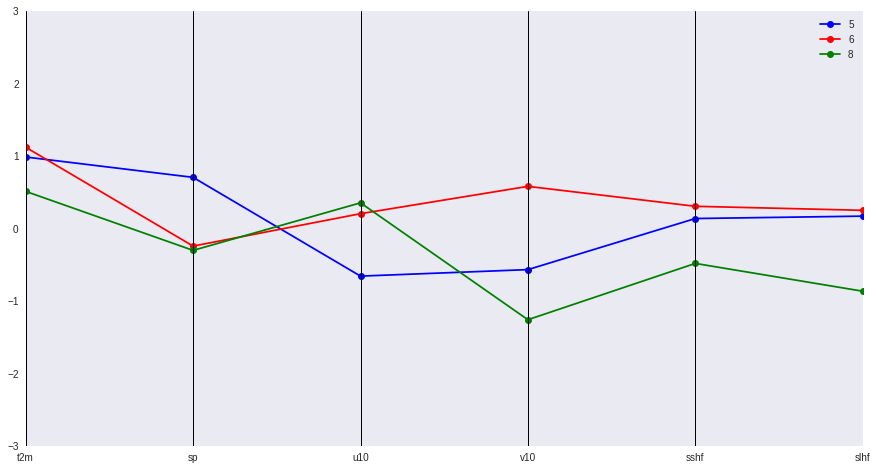

In [ ]:
parallel_plot(P[P['t2m'] > 0.5])

Cold days

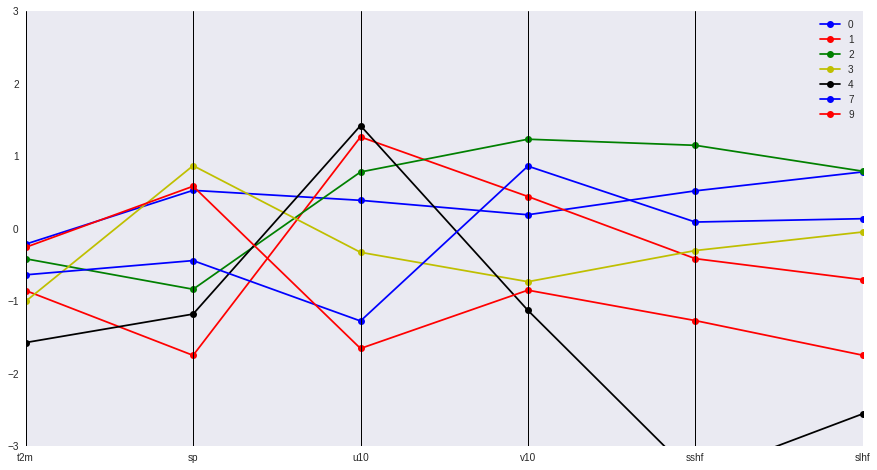

In [ ]:
parallel_plot(P[P['t2m'] < 0.5])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbcd074be90>,
      dtype=object)

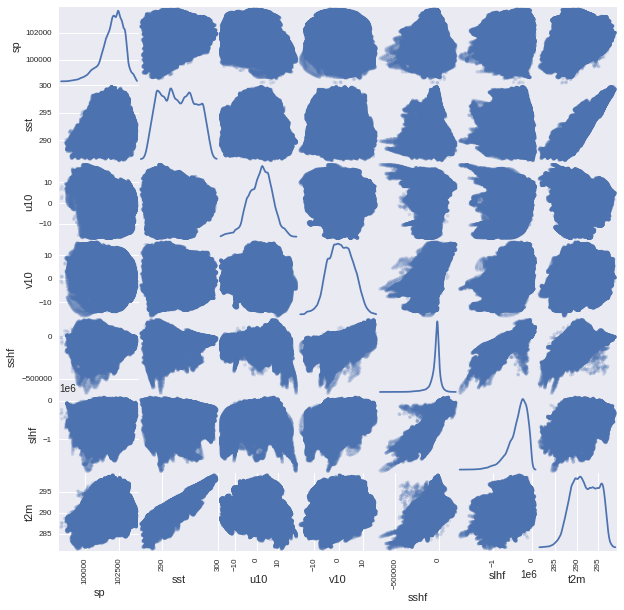

In [ ]:
import numpy as np 
import pandas as pd
from pandas.plotting import scatter_matrix

#first make some fake data with same layout as yours
data = pd.DataFrame(dfc, columns=['sp', 'sst', 'u10', 'v10', 'sshf',
       'slhf', 't2m'])

#now plot using pandas 
scatter_matrix(data, alpha=0.2, figsize=(10, 10), diagonal='kde')


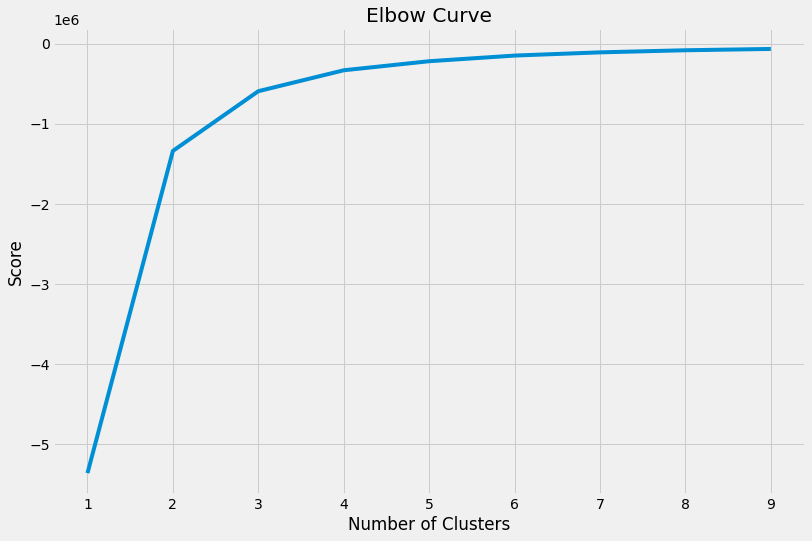

In [ ]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = dfc[['latitude']]
X_axis = dfc[['longitude']]

#Y_axis = dfc[['u10']]
#X_axis = dfc[['t2m']]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(dfc[dfc.columns[1:4]]) # Compute k-means clustering.
dfc['cluster_label'] = kmeans.fit_predict(dfc[dfc.columns[1:4]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(dfc[dfc.columns[1:4]]) # Labels of each point
dfc.head()


,time,longitude,latitude,sp,sst,u10,v10,sshf,slhf,t2m,cluster_label
0,2021-01-01,-33.0,43.00,102443.676498,290.120809,-4.228059,6.211163,-54768.985283,-366915.151420,288.584571,1
1,2021-01-01,-33.0,42.75,102431.303226,290.198989,-4.576805,6.044397,-58761.417840,-377165.066486,288.613673,1
2,2021-01-01,-33.0,42.50,102417.453815,290.163838,-4.906288,5.802354,-57550.053178,-371312.809607,288.611921,1
3,2021-01-01,-33.0,42.25,102405.135686,289.908009,-5.190528,5.499212,-46510.295414,-341469.980193,288.590937,1
4,2021-01-01,-33.0,42.00,102391.629859,289.776023,-5.454725,5.185138,-41360.587035,-323312.525079,288.588804,1


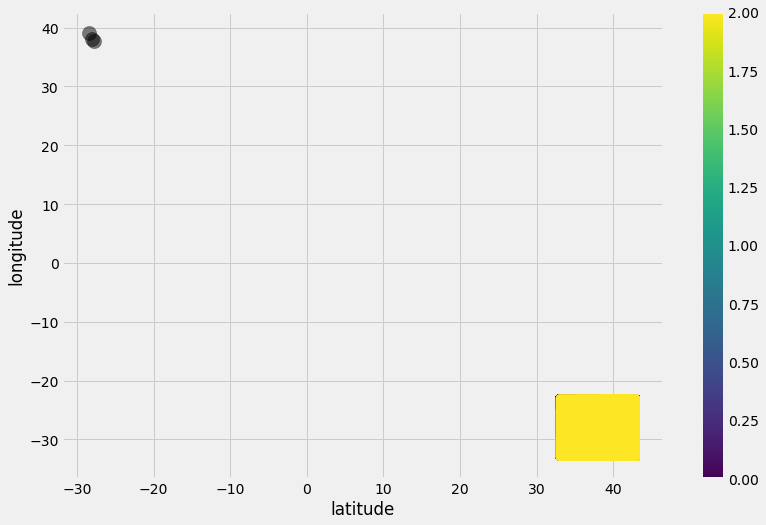

In [ ]:
dfc.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)


In [ ]:
centers = kmeans.cluster_centers_
print(centers)